# Integrantes

ANA PAULA SEGUNDO VELAZQUEZ

JESIMIEL ARBELBIRAI VALDESPINO VEGA

TANIA MONTSERRAT

RICARDO VELASCO CARRASCO

BEATRIZ YUNUEN GONZÁLEZ RODRÍGUEZ

FERNANDO VERGARA MÉNDEZ

## Ejercicio

Se tienen $2$ urnas, cada una de las cuales contiene $10$ bolas numeradas del $1$ al $10$.

Un experimento aleatorio consiste en seleccionar al azar una bola de cada urna.

Sea $X$ la variable aleatoria que representa la diferencia de los números de las dos bolas seleccionadas.

* Define $\Omega$
* Calcula las probabilidades asociadas
* Define la función de densidad
* Verifica que $\sum_{x\in R_X}f_X(x) = 1$
* Gráfica la función de densidad

Además, calcula la probabilidad de que los números de las dos bolas seleccionadas difieran por $2$ o más.

## Solución

Sea $$\Omega = \{ (x,y) | x,y \in \{ 1,2,3,4,5,6,7,8,9,10 \} \} $$

In [ ]:
from itertools import product
import numpy as np
from fractions import Fraction
from collections import defaultdict
import pandas as pd

In [ ]:
omega = set(product({1,2,3,4,5,6,7,8,9,10},repeat=2))

In [ ]:
def p(a):
  p = Fraction(len(a),len(omega))
  return p

In [ ]:
s = {(x,y) : x-y for x,y in omega}

In [ ]:
ds = defaultdict(set)

In [ ]:
for i,j in s.items():
  ds[j].add(i)

In [ ]:
list(ds.items())

In [ ]:
leys={i : p(a) for i,a in ds.items()}

In [ ]:
leys

Recordemos que:

$$X : \Omega \to \mathbb{R} $$

$$ f_X(x) = \begin{cases} \mathbb{P}(X=x), \quad \text{si } x\in R_{X} \\ 0 \quad \text{e.o.c} \end{cases} $$

Para nuestro evento $$s_n = \{ (x,y) \in \Omega : x-y = n \} $$ se tiene la siguiente variable aleatoria:
$$s:\Omega \rightarrow \{ -9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 \}$$

In [ ]:
ley_s = pd.Series(leys)

In [ ]:
ley_s.sort_index()

In [ ]:
def leys(i):
  if i in range(-9,10):
    x = ley_s[i]
  else:
    x=0
  return x

In [ ]:
#Lista de posibles valores
rango_s=[k for k in range(-9,10)]

#Proba de cada suma
p_k = [float(leys(k)) for k in rango_s]

In [ ]:
len(rango_s), len(p_k)

(19, 19)

In [ ]:
# Dataframe: rango_s y probas p_k
df = pd.DataFrame({'rango_s':rango_s,
                   'p_k':p_k},
                   index = [f"s({i})" for i in range(-9,10)])
df['p_k'] = df['p_k'].apply(lambda x: x)
df.columns = ['Rango', 'Densidad']
df

,Rango,Densidad
s(-9),-9,0.01
s(-8),-8,0.02
s(-7),-7,0.03
s(-6),-6,0.04
s(-5),-5,0.05
s(-4),-4,0.06
s(-3),-3,0.07
s(-2),-2,0.08
s(-1),-1,0.09
s(0),0,0.10


In [ ]:
# Se cumple la condición que la suma de todas las probabilidades es 1
df['Densidad'].sum()

1.0

<Axes: xlabel='Rango'>

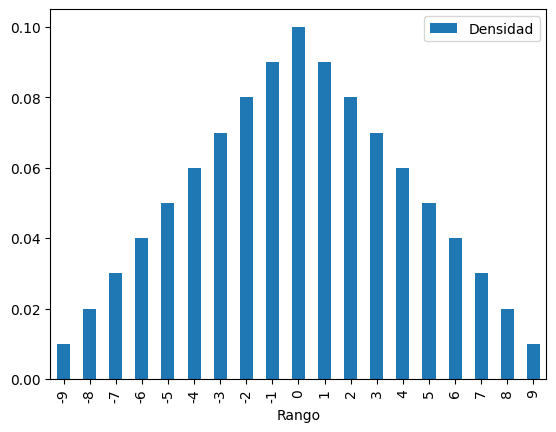

In [ ]:
df.plot.bar(x='Rango', y='Densidad')

Calcula la probabilidad de que los números de las dos bolas seleccionadas difieran por  2  o más.

In [ ]:
omega = set(product({1,2,3,4,5,6,7,8,9,10},repeat=2))

s = {(x,y) : abs(x-y) for x,y in omega} #Usamos valor absoluto para la diferencia

ds = defaultdict(set)
for i,j in s.items():
  ds[j].add(i)

leys={i : p(a) for i,a in ds.items()}

# Calcula la probabilidad de que los números difieran por 2 o más
prob_diferencia_2_o_mas = sum(leys[i] for i in leys if i >= 2)

print(f"La probabilidad de que los números difieran en 2 o más es: {prob_diferencia_2_o_mas}")


La probabilidad de que los números difieran en 2 o más es: 18/25
